# Session 8 - Pandas Basics. 

## PGPDS Praxis Business School - January 2019

submitted by
Anagha Karanam
C19002

# Part1 

In [3]:
#pandas is an open source Python library for data analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Series
'''
 Series is a one-dimensional object similar
 to an array, list, or column in a table. 
 It will assign a labeled index to each item in the Series.

'''
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])

print("Printing a sample series:\n",s)
print("-------------------------")
#we can also give it without index, in which case it automatically assigns sequences.

#Series can convert a dictionary to a series as well. A dictioanry consists of keys & values
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}

cities = pd.Series(d)
print("Cities are:\n",cities)

Printing a sample series:
 A                7
Z       Heisenberg
C             3.14
Y      -1789710578
E    Happy Eating!
dtype: object
-------------------------
Cities are:
 Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64


In [5]:
# Selecting specific items from the series
print("Number in chicago",cities['Chicago'])
print("\n Selecting more than one item")
cities[['Chicago', 'Portland', 'San Francisco']]

Number in chicago 1000.0

 Selecting more than one item


Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [6]:
#boolean indexing for selection
print("Boolean indexing for selection",cities[cities < 1000])
#changing values using boolean indexing
cities[cities <= 1100] = 750
print("Changing values using boolean indexing:",cities[cities == 750])


Boolean indexing for selection Portland    900.0
Austin      450.0
dtype: float64
Changing values using boolean indexing: Chicago          750.0
Portland         750.0
San Francisco    750.0
Austin           750.0
dtype: float64


In [7]:
#checking if an item is in the series of the dataframe using 'in'

print('San Francisco' in cities)

#Mathematical operations can be done using scalars and functions.
print("Square of citites:\n",np.square(cities))


True
Square of citites:
 Chicago           562500.0
New York         1690000.0
Portland          562500.0
San Francisco     562500.0
Austin            562500.0
Boston                 NaN
dtype: float64


In [8]:
#Addition on the series together returns a union of the series. And returns
#null if they dont have a shared index.

print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])
print("----------------------------------")
#null checking can be done using is.null()
print("is cities having null \n",cities.isnull())
print("Values having null can be obtained like this: \n ",print(cities[cities.isnull()]))

Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64
----------------------------------
is cities having null 
 Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston            True
dtype: bool
Boston   NaN
dtype: float64
Values having null can be obtained like this: 
  None


### Dataframes Basics

In [9]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [10]:
#Reading from a csv file. 
from_csv = pd.read_csv('RELIANCE.NS.csv')
from_csv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-16,939.599976,942.599976,918.099976,921.299988,915.653320,4401672.0
2,2018-02-19,921.000000,932.000000,913.549988,927.000000,921.318420,4087936.0
3,2018-02-20,929.000000,929.549988,918.799988,921.099976,915.454529,3866919.0
4,2018-02-21,930.000000,932.500000,922.150024,929.349976,923.653992,5448230.0


In [11]:
#Writing & Reading to an excel file

football.head()
football.to_excel('football.xlsx', index=False)

In [12]:
!ls

RELIANCE.NS.csv                      football.xlsx
Session 7 Numpy.ipynb                ml-100k
Session8_Pandas.ipynb                newfile
Session8_anagha_karanam.ipynb        praxis_python_class2.py
__pycache__                          session6_pgpds_anagha_karanam.ipynb
assets                               test_functions.py
city-of-chicago-salaries.csv         testfile
city-of-chicago-salaries2.csv        venv
class1_python_hardway_examples.ipynb


In [13]:
del football
football = pd.read_excel('football.xlsx')
football

#similarly we can also read from a database, or an url directly. 

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


# Part2

In [14]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [15]:
#Inspection of the dataframes. 

#Info. Gives a summary of the dataframe, columns, data in columns info
#amount of RAm used for holding the dataframe. etc.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [16]:
#Describe gives the stats.
users.describe()


,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
#while, head gives the top level rows, tail gives the last level rows of the df

movies. tail(3)



,movie_id,title,release_date,video_release_date,imdb_url
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...


In [18]:
#slicing can also be used to fetch the rows of the df
movies[20:22]

,movie_id,title,release_date,video_release_date,imdb_url
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...


In [19]:
#getting rows of a few columns.
print(users[['age', 'zip_code']].head())

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213


In [20]:
#Row selection based on some conditions
# users aged 40 AND male
print(users[(users.age == 40) & (users.sex == 'M')].head(3))

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232


In [21]:
#set index returns a new dataframe. 
#Below code does not change the data frame.
with_new_index = users.set_index('user_id')
print(with_new_index.head())

         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


In [22]:
#inplace parameter - for not returning a new df & modifying an existing one.
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [23]:
#we can select rows of the df using the iloc method.
print(users.iloc[[1, 50, 300]])

#loc method is used to select rows by label.
print(users.loc[[2, 51, 301]])

         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439
         age sex occupation zip_code
user_id                             
2         53   F      other    94043
51        28   M   educator    16509
301       24   M    student    55439


In [24]:
#reset_index resets the index. 
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [25]:
#JOINS.

left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [26]:
#inner join - is default
pd.merge(left_frame, right_frame, on='key', how='inner')
#left_on, right_on is used to specify keys of joins. 


,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [27]:
#left outer join example.
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [28]:
#right outer join
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


In [29]:
#full outer join
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


In [30]:
#Combining Dataframes. 
#Combining is similar to union but has lot of other parameters as well.
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [31]:
#conatinating side by side
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


In [32]:
!head -n 3 city-of-chicago-salaries2.csv

Name,Position Title,Department,Employee Annual Salary
"AARON,  ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
"AARON,  JEFFERY M",POLICE OFFICER,POLICE,$75372.00


In [33]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries2.csv', 
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$', ''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


In [34]:
#Group By
#pandas groupby returns a DataFrameGroupBy object which has a variety of methods,
#many of which are similar to standard SQL aggregate functions.
by_dept = chicago.groupby('department')
by_dept

In [35]:
# count returns NOT NULL records within each column
print(by_dept.count().head()) 

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9


In [36]:
#pandas sum, mean & median. 
print("Sum is: ", by_dept.sum()[20:25]) # total salaries of each department
print("\n ---------")
print("Mean is: ", by_dept.mean()[20:25]) # average salary of each department
print("\n ---------")
print("Median is: ", by_dept.median()[20:25]) # take that, RDBMS!

Sum is:                         salary
department                   
HUMAN RESOURCES     4850928.0
INSPECTOR GEN       4035150.0
IPRA                7006128.0
LAW                31883920.2
LICENSE APPL COMM     65436.0

 ---------
Mean is:                           salary
department                     
HUMAN RESOURCES    71337.176471
INSPECTOR GEN      80703.000000
IPRA               82425.035294
LAW                70853.156000
LICENSE APPL COMM  65436.000000

 ---------
Median is:                      salary
department                
HUMAN RESOURCES    68496.0
INSPECTOR GEN      76116.0
IPRA               82524.0
LAW                66492.0
LICENSE APPL COMM  65436.0


In [37]:
#how to do something similar to sql DISTINCT count
by_dept.title.nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

In [38]:
#split-apply-combine
def ranker(df):
    
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
print(chicago[chicago.dept_rank == 1].head(7))

                         name                     title      department  \
18039     MC CARTHY,  GARRY F  SUPERINTENDENT OF POLICE          POLICE   
8004           EMANUEL,  RAHM                     MAYOR  MAYOR'S OFFICE   
25588       SANTIAGO,  JOSE A         FIRE COMMISSIONER            FIRE   
763    ANDOLINO,  ROSEMARIE S  COMMISSIONER OF AVIATION        AVIATION   
4697     CHOUCAIR,  BECHARA N    COMMISSIONER OF HEALTH          HEALTH   
21971      PATTON,  STEPHEN R       CORPORATION COUNSEL             LAW   
12635      HOLT,  ALEXANDRA D                BUDGET DIR   BUDGET & MGMT   

         salary  dept_rank  
18039  260004.0          1  
8004   216210.0          1  
25588  202728.0          1  
763    186576.0          1  
4697   177156.0          1  
21971  173664.0          1  
12635  169992.0          1  


# Part 3 Using Pandas with Movie Lens Dataset

In [39]:
chicago[chicago.department == "LAW"][:5]

,name,title,department,salary,dept_rank
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
6311,"DARLING, LESLIE M",FIRST ASST CORPORATION COUNSEL,LAW,149160.0,2
17680,"MARTINICO, JOSEPH P",CHIEF LABOR NEGOTIATOR,LAW,144036.0,3
22357,"PETERS, LYNDA A",CITY PROSECUTOR,LAW,139932.0,4
31383,"WONG JR, EDWARD J",DEPUTY CORPORATION COUNSEL,LAW,137076.0,5


In [40]:
#What are the 25 most rated movies?
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [41]:
#nifty value_counts method does the same thing as above.

lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

In [42]:
#which movies are highly rated?
#Agg method is used to to pass a dictionary specifying
#the columns to aggregate (as keys) and a list of functions we'd like to apply.

movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [45]:
# sorting the above resulting data frame to see the top values.
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [46]:
#movies that have been rated at least 100 times.
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

# Because our columns are now a MultiIndex, we need to pass in a tuple specifying how to sort.

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [47]:
#Checking the movies which have been rated atleast a hundred times. 
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [49]:
#Now, in this step we tak the 50 most rated movies. 
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

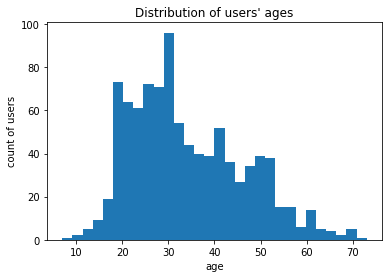

In [50]:
#lets do something similar to EXISTS IN sql
#filtering examples. 
#Q. Which movies are most controversial amongst different ages?
# STEP 1: First looking at a histogram of users by ages

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');



In [51]:
# STEP 2: bin our users into age groups using pandas.cut.
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [52]:
#STEP 3: compare ratings across age groups. using agg function.

lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [73]:
# 50 most rated movies are viewed across each age group.
lens.set_index('movie_id', inplace=True)

by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

In [74]:
#unstack is used to view the df as a table
#1 & 0 in unstack specifes the groupby multiindex values to take as row
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [75]:
#Question: Which movies do men and women most disagree on?
#pivoting, if- cases in sql can be made less verbose using dataframe's PIVOT TABLE method.
lens.reset_index('movie_id', inplace=True)


In [76]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()


,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [77]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [78]:
pivoted.reset_index('movie_id', inplace=True)

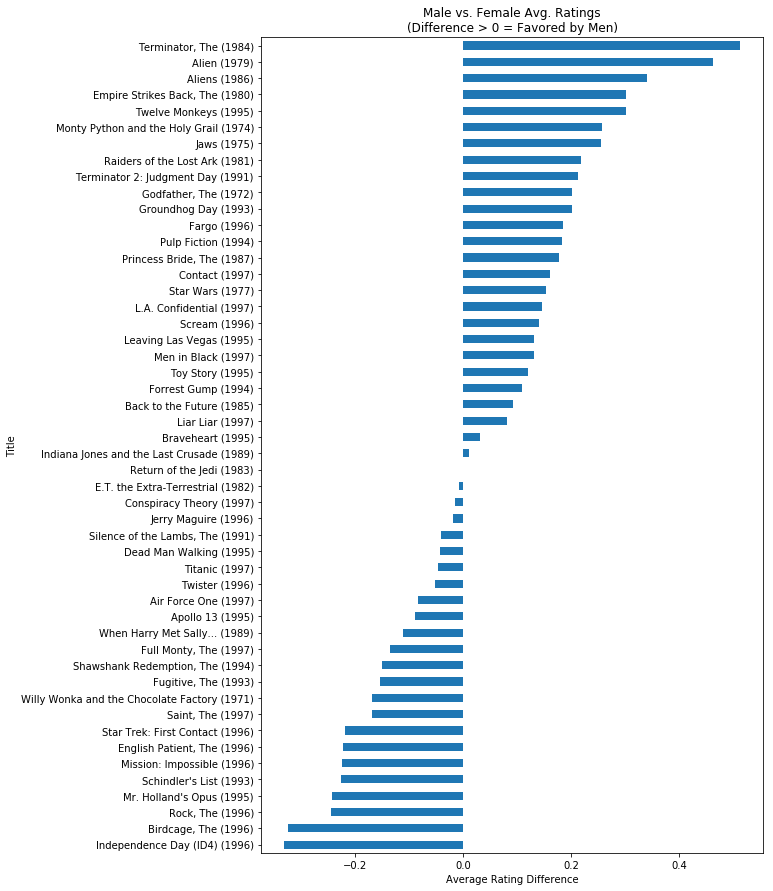

In [79]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');